<a href="https://colab.research.google.com/github/ariaghora/pascal-ml-class/blob/master/python/pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
import torch
import numpy as np

# Neural net sederhana

In [294]:
data_mobil = np.loadtxt('cancer.csv', delimiter=',')  

x = data_mobil[:, range(30)]
x = (x - x.mean(0)) / x.std(0)  # normalisasi

jml_sampel, jml_feature = x.shape

y = data_mobil[:, 30].reshape(jml_sampel, 1) # kolom label

## Konversi data numpy ke tensor

In [295]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [258]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

w1 = torch.zeros((30, 10))
w2 = torch.zeros((10, 1))
b1 = torch.zeros((1, 10))
b2 = torch.zeros((1, 1))

model_params = [w1, b1, w2, b2]
for param in model_params:
    param.requires_grad_(True)

lr = 0.1

# optim = torch.optim.SGD(model_params, lr)

errs = []
# training via gradient descent
for i in range(2000):
    hidden1 = sigmoid(x @ w1 + b1)
    y_pred = sigmoid(hidden1 @ w2 + b2)

    loss = -(1 / jml_sampel) * torch.sum(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    loss.backward() # <-- kunci: automatic gradient computation

    errs.append(loss.item())
    
    w1.data = w1.data - lr * w1.grad
    b1.data = b1.data - lr * b1.grad
    w2.data = w2.data - lr * w2.grad
    b2.data = b2.data - lr * b2.grad
    
    # optim.step() atau dengan optimizer <==

    # reset gradient, agar tidak terus menerus terakumulasi
    # tiap iterasi
    
    for param in model_params:
        param.grad = None

    # atau optim.zero_grad()

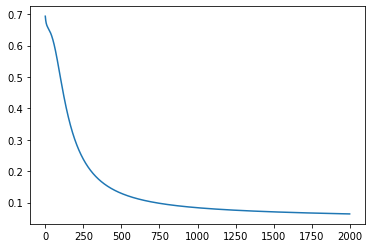

In [259]:
import matplotlib.pyplot as plt
plt.plot(errs)

In [256]:
((y_pred>0.5) == y).float().mean()

tensor(0.9859)

# Neural net 2 hidden layer

In [131]:
from sklearn.preprocessing import label_binarize

In [261]:
# Digit dataset
dataset_train = np.loadtxt('optdigits-train.csv', delimiter=',')  

# feature
x = dataset_train[:, range(64)]
x = x / x.max()
jml_sampel, jml_feature = x.shape

# kolom label
y = dataset_train[:, 64].reshape(jml_sampel, 1)

# Kasus ini adalah klasifikasi dengan jml kelas > 2. 
# Kolom label harus dikonversi dalam format "one-hot" encoding
classes = [i for i in range(10)] # kelas kita adalah digit 0-9
y = label_binarize(y, classes)

# Konversi ke tensor
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

## Visualisasi

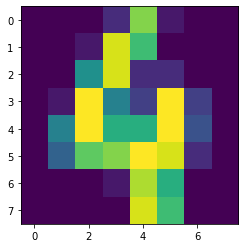

Label: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])


In [262]:
plt.imshow(x[100].reshape(8,8))
plt.show()
print(f'Label: {y[100]}')

In [275]:
# Model kita
w1 = torch.randn(64, 100) / 100 # dibagi 100 agar tidak terlalu besar
w2 = torch.randn(100, 20) / 100
w3 = torch.randn(20, 10) / 100
b1 = torch.zeros(100)
b2 = torch.zeros(20)
b3 = torch.zeros(10)

model_params = [w1, w2, w3, b1, b2, b3]
for param in model_params:
    param.requires_grad_(True)


lr = 0.01
optim = torch.optim.Adam(model_params, lr=lr)
ce_loss = torch.nn.CrossEntropyLoss()

# def pred(x):

for i in range(1000):
    hidden1 = torch.sigmoid(x @ w1 + b1)
    hidden2 = torch.sigmoid(hidden1 @ w2 + b2)
    y_pred = torch.softmax(hidden2 @ w3 + b3, 1)

    loss = -torch.mean(torch.sum(y * torch.log(y_pred), 1))
    loss.backward()

    if i % 100 == 0:
        print(f'loss di iterasi {i}: {loss.item()}')

    optim.step()

    for param in model_params:
        param.grad = None

loss di iterasi 0: 2.3028295040130615
loss di iterasi 100: 0.2580100893974304
loss di iterasi 200: 0.043125350028276443
loss di iterasi 300: 0.015293220989406109
loss di iterasi 400: 0.008089594542980194
loss di iterasi 500: 0.004528537858277559
loss di iterasi 600: 0.003132701152935624
loss di iterasi 700: 0.002328142523765564
loss di iterasi 800: 0.0018105373019352555
loss di iterasi 900: 0.0014537964016199112


In [276]:
train_acc = (y_pred.argmax(1) == y.argmax(1)).float().mean()
print(f'train accuracy = {train_acc}')

train accuracy = 1.0


In [277]:
# Test digit dataset
dataset_test = np.loadtxt('optdigits-test.csv', delimiter=',')  

# feature
x_test = dataset_test[:, range(64)]
x_test = x_test / x_test.max()
x_test = torch.from_numpy(x_test).float()

jml_sampel, jml_feature = x_test.shape

# label
y_test = dataset_test[:, 64].reshape(jml_sampel, 1)
y_test = torch.from_numpy(y_test).float()

In [278]:
# prediksi
hidden1 = torch.sigmoid(x_test @ w1 + b1)
hidden2 = torch.sigmoid(hidden1 @ w2 + b2)
y_pred = torch.softmax(hidden2 @ w3 + b3, 1)

test_acc = (y_pred.argmax(1, keepdim=True) == y_test).float().mean()

In [279]:
print(f'test accuracy = {test_acc}')

test accuracy = 0.9588202834129333


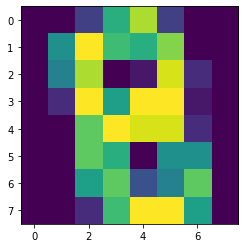

In [286]:
plt.imshow(x_test[500].reshape(8,8))

In [288]:
# prediksi
hidden1 = torch.sigmoid(x_test[500].reshape(1, -1) @ w1 + b1)
hidden2 = torch.sigmoid(hidden1 @ w2 + b2)
y_pred = torch.softmax(hidden2 @ w3 + b3, 1)

In [291]:
y_pred.argmax(1)

tensor([8])